### Task 4 Exploratory Data Analysis - Terrorism
### Author : Viraj patel

__(1) find out the hot zone of terrorism.__ 

__(2) What all security issues and insights you can derive by EDA?__

In [1]:
#import library
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Load Data 

In [2]:
terrorism=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")
terrorism.head()

C:\Users\patel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
###Get column names
terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
terrorism.isnull().sum().sort_values(ascending=False).head(20)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181177
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
dtype: int64

In [5]:
#remove all the column whose more than 20% data are not known
limit=len(terrorism)*0.8
data1=terrorism.dropna(thresh=limit,axis=1)
data1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1


In [6]:
#print column name of data1
data1.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'weaptype1',
       'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'nkill',
       'nwound', 'property', 'ishostkid', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'], dtype=object)

In [7]:
#rename the dataset which contain less than 20% not null values
data1.rename(
    columns={
        "iyear": "year",
        "imonth": "month",
        "iday": "day",
        "country_txt": "country_name",
        "region_txt": "region_name",
        "provstate": "state",
        "success": "successful_attack",
        "suicide": "suicide_attack",
        "attacktype1": "attacktype",
        "attacktype1_txt": "attack_method",
        "targtype1": "targtype",
        "targtype1_txt": "target",
        "targsubtype1": "targsubtype",
        "targsubtype1_txt": "target_general",
        "target1": "target_specific",
        "natlty1_txt": "nationality",
        "gname": "terrorist_group",
        "weaptype1": "",
        "weaptype1": "weaptype",
        "weaptype1_txt": "weapontype",
        "weapsubtype1": "weaponsubtype",
        "weapsubtype1_txt": "weapon_specific",
        "nkill": "killed",
        "nwound": "wounded",
        "dbsource": "source",
    },inplace=True,
)
data1.columns.values

C:\Users\patel\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['eventid', 'year', 'month', 'day', 'extended', 'country',
       'country_name', 'region', 'region_name', 'state', 'city',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'successful_attack',
       'suicide_attack', 'attacktype', 'attack_method', 'targtype',
       'target', 'targsubtype', 'target_general', 'target_specific',
       'natlty1', 'nationality', 'terrorist_group', 'guncertain1',
       'individual', 'weaptype', 'weapontype', 'weaponsubtype',
       'weapon_specific', 'killed', 'wounded', 'property', 'ishostkid',
       'source', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype=object)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   eventid            181691 non-null  int64  
 1   year               181691 non-null  int64  
 2   month              181691 non-null  int64  
 3   day                181691 non-null  int64  
 4   extended           181691 non-null  int64  
 5   country            181691 non-null  int64  
 6   country_name       181691 non-null  object 
 7   region             181691 non-null  int64  
 8   region_name        181691 non-null  object 
 9   state              181270 non-null  object 
 10  city               181257 non-null  object 
 11  latitude           177135 non-null  float64
 12  longitude          177134 non-null  float64
 13  specificity        181685 non-null  float64
 14  vicinity           181691 non-null  int64  
 15  crit1              181691 non-null  int64  
 16  cr

In [9]:
#remove unnecessory data
data2=data1[['year','month','day','extended','country','country_name','region','region_name','latitude','longitude','state','killed','wounded',
             'terrorist_group','attack_method','target','target_specific','weapontype','city']]
data2.head()

,year,month,day,extended,country,country_name,region,region_name,latitude,longitude,state,killed,wounded,terrorist_group,attack_method,target,target_specific,weapontype,city
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,18.456792,-69.951164,NaN,1.0,0.0,MANO-D,Assassination,Private Citizens & Property,Julio Guzman,Unknown,Santo Domingo
1,1970,0,0,0,130,Mexico,1,North America,19.371887,-99.086624,Federal,0.0,0.0,23rd of September Communist League,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Unknown,Mexico city
2,1970,1,0,0,160,Philippines,5,Southeast Asia,15.478598,120.599741,Tarlac,1.0,0.0,Unknown,Assassination,Journalists & Media,Employee,Unknown,Unknown
3,1970,1,0,0,78,Greece,8,Western Europe,37.997490,23.762728,Attica,NaN,NaN,Unknown,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Explosives,Athens
4,1970,1,0,0,101,Japan,4,East Asia,33.580412,130.396361,Fukouka,NaN,NaN,Unknown,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Incendiary,Fukouka


In [10]:
data2.shape #shape of the data

(181691, 19)

In [11]:
data2.isnull().sum() #check for null value

year                   0
month                  0
day                    0
extended               0
country                0
country_name           0
region                 0
region_name            0
latitude            4556
longitude           4557
state                421
killed             10313
wounded            16311
terrorist_group        0
attack_method          0
target                 0
target_specific      636
weapontype             0
city                 434
dtype: int64

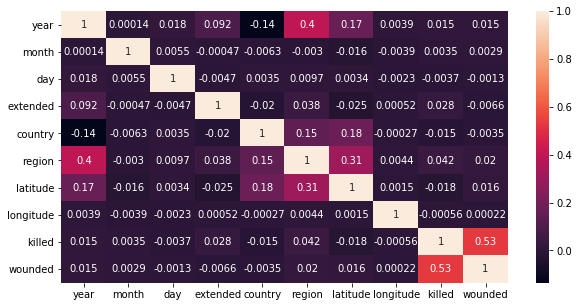

In [12]:
#Heat Map
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [13]:
#shows the attack year with the number of attack
data2['year'].value_counts().head(10)

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: year, dtype: int64

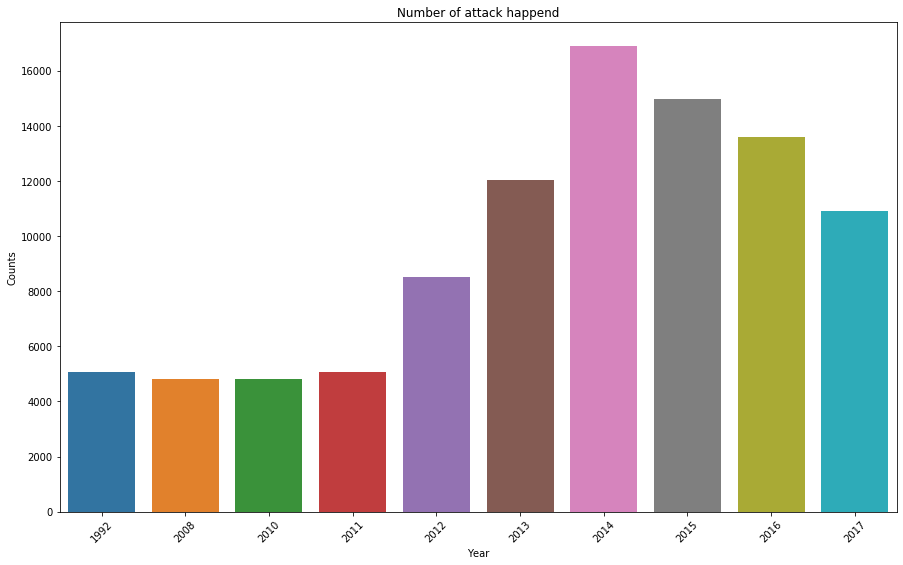

In [14]:
plt.figure(figsize=(15,9))
sns.barplot(data2['year'].value_counts()[:10].index,data2['year'].value_counts()[:10].values)
plt.title('Number of attack happend')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

### Highest number of attacks happend in 2014

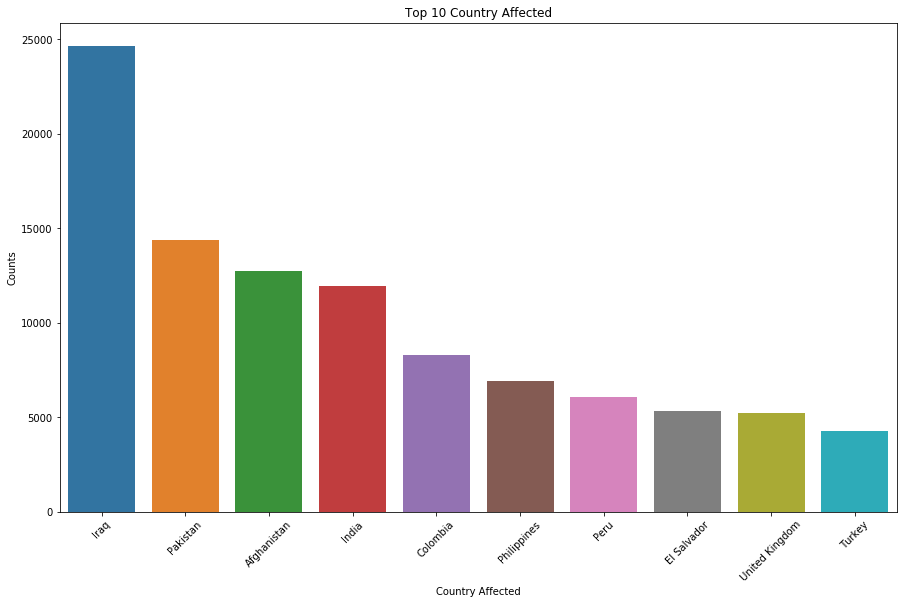

In [15]:
plt.figure(figsize=(15,9))
sns.barplot(data2['country_name'].value_counts()[:10].index,data2['country'].value_counts()[:10].values)
plt.title('Top 10 Country Affected')
plt.xlabel('Country Affected')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

### Most Affected Country is Iraq

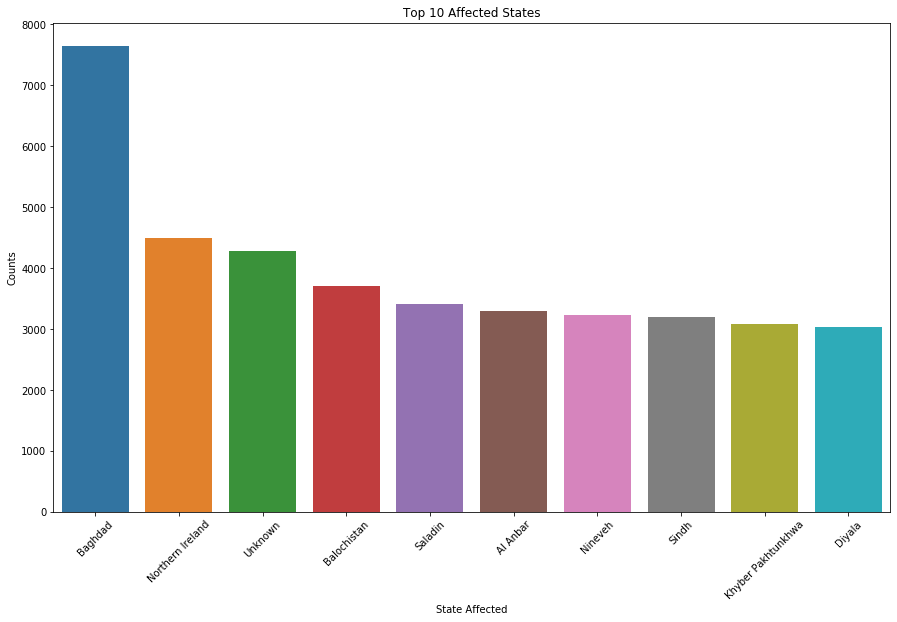

In [16]:
plt.figure(figsize=(15,9))
sns.barplot(data2['state'].value_counts()[:10].index,data2['state'].value_counts()[:10].values)
plt.title('Top 10 Affected States')
plt.xlabel('State Affected')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

### Most Affected state is baghdad

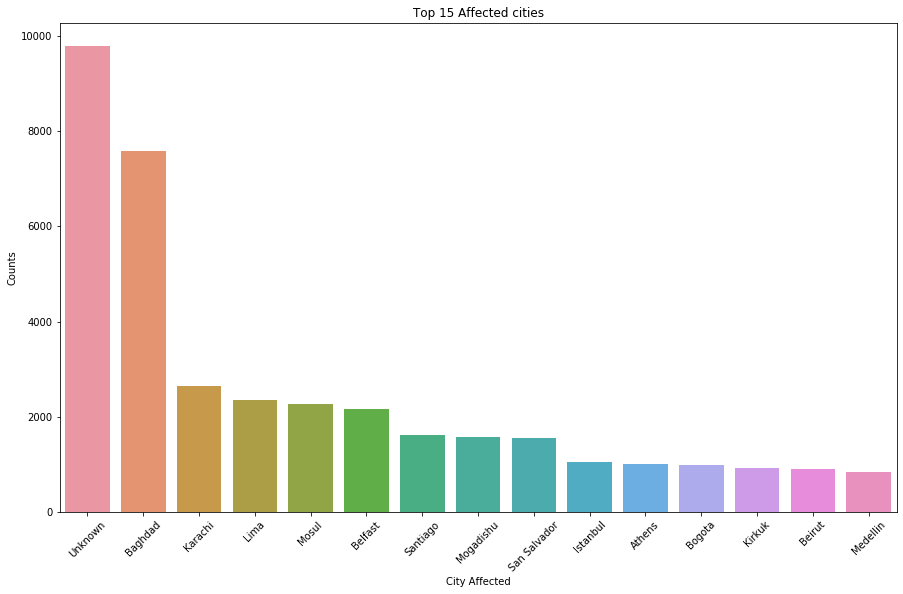

In [17]:
plt.figure(figsize=(15,9))
sns.barplot(data2['city'].value_counts()[:15].index,data2['city'].value_counts()[:15].values)
plt.title('Top 15 Affected cities')
plt.xlabel('City Affected')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

### Most affected city is unknown

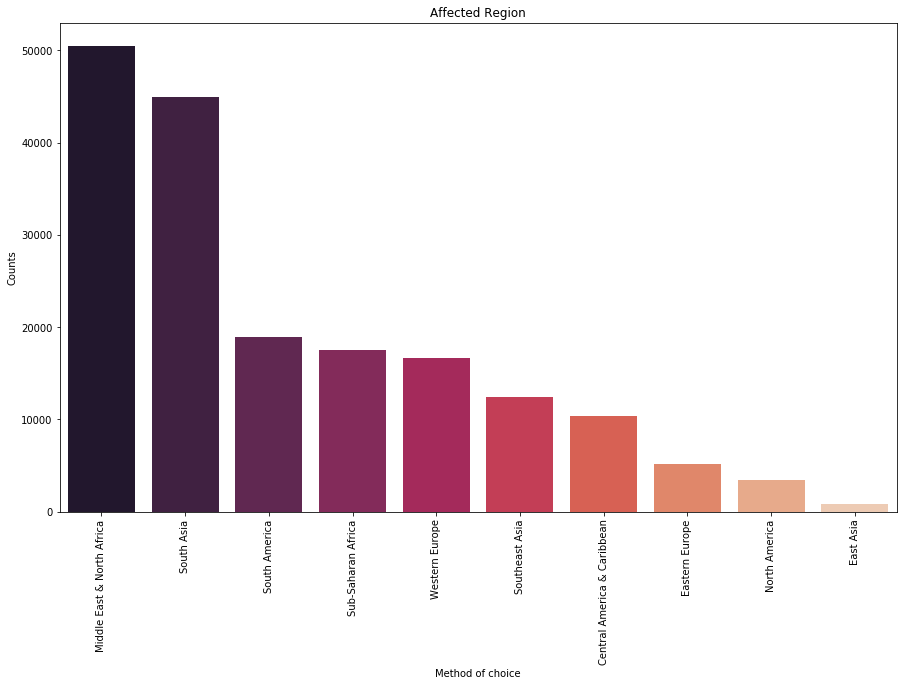

In [24]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["region_name"].value_counts()[:10].index,
    data2["region"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Affected Region")
plt.xlabel("Method of choice")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show();

### Most Affected region is Middle East & North Africa

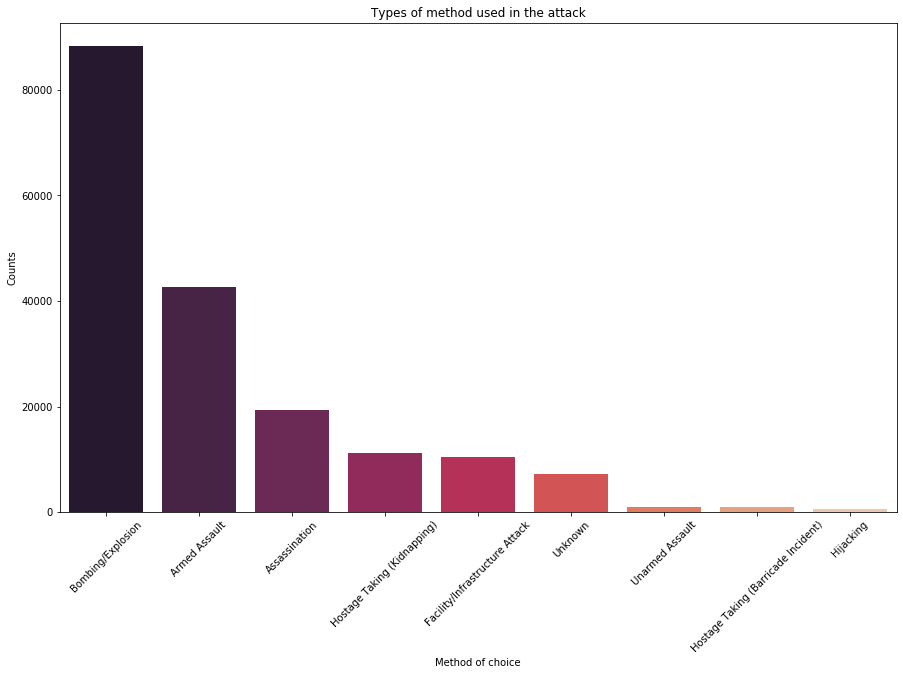

In [19]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["attack_method"].value_counts()[:10].index,
    data2["attack_method"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of method used in the attack")
plt.xlabel("Method of choice")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show();

### Bombing/Explosion is the most useful method to spread a terrorism

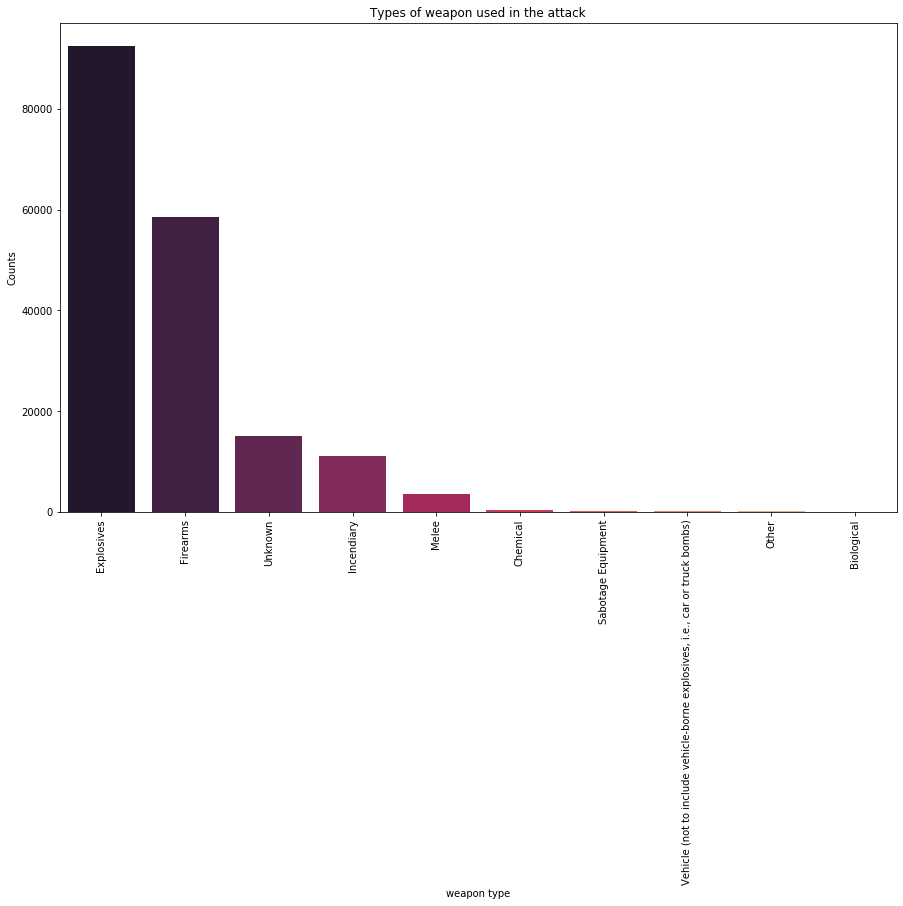

In [20]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["weapontype"].value_counts()[:10].index,
    data2["weapontype"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of weapon used in the attack")
plt.xlabel("weapon type")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show();

### Explosive and Firearms is the most used weapon by terrorist group.

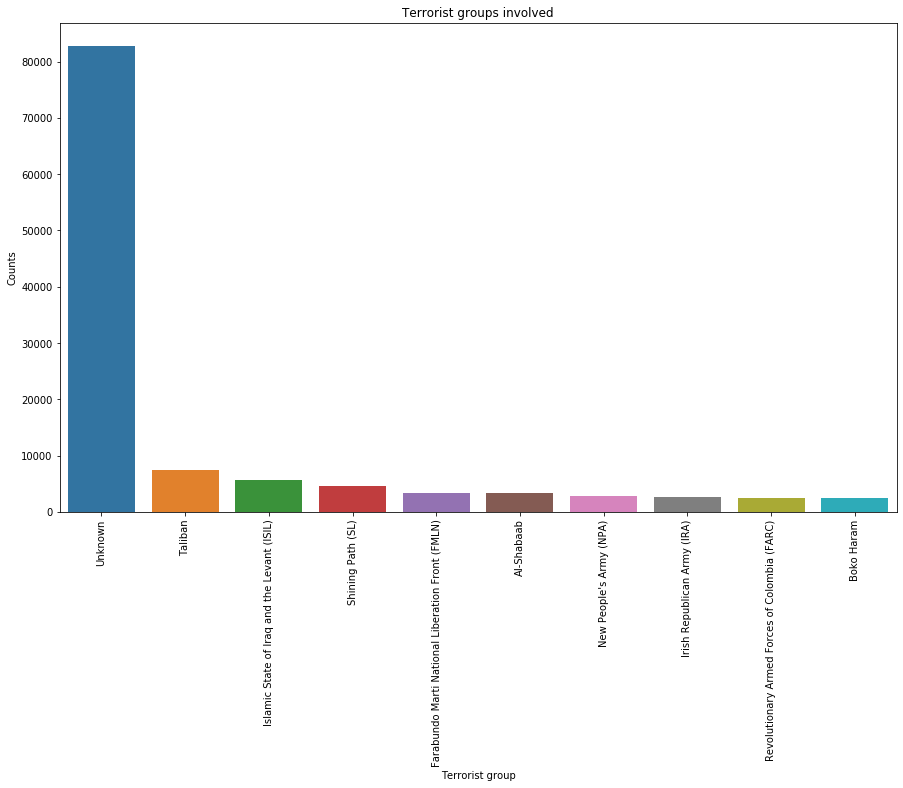

In [22]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["terrorist_group"].value_counts()[ :10].index,
    data2["terrorist_group"].value_counts()[ :10].values,
)
plt.title("Terrorist groups involved")
plt.xlabel("Terrorist group")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show();

In [23]:
print( 
    "Total number of people killed in terrorist attacks between 1970 and 2017 are "
    + str(data2["killed"].sum())
)
print()
print(
    "Total number of people killed in terrorist attacks between 1970 and 2017 are "
    + str(data2["wounded"].sum())
)
print()
print(
    "Total number of people affected by terrorist attacks between 1970 and 2017 are "
    + str(data2["killed"].sum() + data2["wounded"].sum())
)

Total number of people killed in terrorist attacks between 1970 and 2017 are 411868.0

Total number of people killed in terrorist attacks between 1970 and 2017 are 523869.0

Total number of people affected by terrorist attacks between 1970 and 2017 are 935737.0


# Conclusion

## Hot Zone

### (1) Most affected country is Iraq
### (2) Most affected state is baghdad
### (3) Most affected region is Middle East and North Africa

## Security issues

### (1) Less awareness of Goverment and people
### (2) Most of the attack is due to Bombing which is a security failure and people are also responsible.

## Insights

### (1) Most of the used weapon is Explosive.